In [49]:
import pyvo
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import ks_2samp

LUego de instalar el paquete, seleccionamos la base de datos del The Extrasolar Planets Encyclopaedia (http://exoplanet.eu/)

In [50]:
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

Pedimos la listas de planetas con masa, radio, período orbital, tipo de detección, semieje mayor y  tipo espetral con un query 

In [51]:
query="SELECT mass,radius,period,detection_type,semi_major_axis,star_spec_type FROM exoplanet.epn_core" 

Para acceder a los resultados del query en una tabla que llamaremos results, escribimos lo siguiente

In [52]:
results = service.search(query) 

Pedimos que nos guarde estos datos en una tabla numpy

In [53]:
np.save('myresults',results.to_table())

Ahora accedemos a la tabla que guardamos

In [54]:
results=np.load('myresults.npy', allow_pickle=True)

 ### Inciso a
 
Debemos estudiar la distribución de índices de masas y períodos orbitales para planetas descubiertos con diferentes técnicas observacionales y analizar los resultados para determinar si existe un sesgo en las propiedades de los exoplanetas en función del tipo de técnica utilizada.

Para empezar sustraemos los datos de masas, períodos y tipo de detección de la tabla.

In [55]:
masas = []
periodos = []
deteccion = []

for i in range (len(results)):
    a = results[i][0]
    b = results[i][2]
    c = results[i][3]
    if a == a and b == b:
        masas.append(np.log10(a))
        periodos.append(np.log10(b))
        deteccion.append(c)
        
        #print(results[i][0],results[i][2])

In [56]:
set(deteccion)

{b'Astrometry',
 b'Imaging',
 b'Microlensing',
 b'Other',
 b'Primary Transit',
 b'Primary Transit#TTV',
 b'Pulsar',
 b'Radial Velocity',
 b'TTV'}

In [60]:
list(set(deteccion))

[b'Imaging',
 b'Primary Transit#TTV',
 b'Pulsar',
 b'Astrometry',
 b'TTV',
 b'Other',
 b'Microlensing',
 b'Radial Velocity',
 b'Primary Transit']

In [72]:
list(set(deteccion))[3]

b'Astrometry'

Armamos una lista donde ordenamos los métodos de forma distinta para que los resultados en el gráfico se puedan ver mejor.

In [73]:
lista = [list(set(deteccion))[8],list(set(deteccion))[7],list(set(deteccion))[4],list(set(deteccion))[0],list(set(deteccion))[2],list(set(deteccion))[6],list(set(deteccion))[3],list(set(deteccion))[5],list(set(deteccion))[1]]

In [74]:
lista

[b'Primary Transit',
 b'Radial Velocity',
 b'TTV',
 b'Imaging',
 b'Pulsar',
 b'Microlensing',
 b'Astrometry',
 b'Other',
 b'Primary Transit#TTV']

Construimos una función para utilizarla para hacer el gráfico. Utilizamos el comando $.decode('utf-8')$ para decodificar los elementos de la lista de los métodos de detección.

No handles with labels found to put in legend.


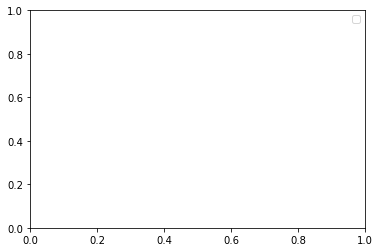

In [58]:
def g(RV,color1):
    l = 0
    p1 = 6
    for k in deteccion:
        if k == RV:

            if p1==6:
                plt.scatter(masas[l],periodos[l],c=color1,label= k.decode('utf-8'))
                p1 = 1
                continue
            if p1 == 1:
                plt.scatter(masas[l],periodos[l],c=color1)

        else:
            continue
        l = l + 1

plt.legend()
plt.show()  

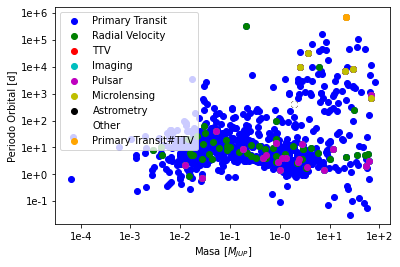

In [75]:
color = ['b','g','r','c','m','y','k','w','orange']
v = 0
for h in lista:
    g(h,color[v])
    v = v + 1
plt.xticks([-4,-3,-2,-1,0,1,2],['1e-4','1e-3','1e-2','1e-1','1e-0','1e+1','1e+2'])
plt.yticks([-1,0,1,2,3,4,5,6],['1e-1','1e+0','1e+1','1e+2','1e+3','1e+4','1e+5','1e+6'])
plt.xlabel('Masa [$M_{JUP}$]')
plt.ylabel('Periodo Orbital [d]')
plt.legend()
plt.show()

### Inciso b

En este inciso debemos estudiar la distribución de los semiejes de los exoplanetas y determinar si la misma es consistente con una distribución gaussiana.

Primero armamos una lista con los semiejes sin contener los 'nan'

In [76]:
semieje = []
for q in range(len(results)):
    d = a = results[q][4]
    if d == d:
        semieje.append(np.log10(d))

Text(0.5, 0, 'Semieje [UA]')

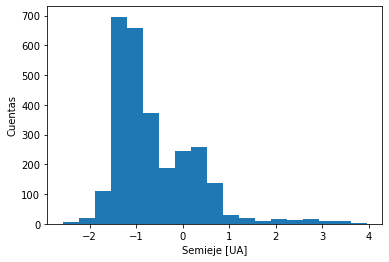

In [80]:
a = plt.hist(semieje, bins = 19)
#plt.xticks([-2,-1,0,1,2,3,4],['1e-2','1e-1','1e+0','1e+1','1e+2','1e+3','1e+4'])
plt.ylabel('Cuentas')
plt.xlabel('Semieje [UA]')

Vemos cuales son límites de los bines del histograma

In [19]:
a[1]

array([-2.58004425, -2.23563204, -1.89121982, -1.54680761, -1.20239539,
       -0.85798318, -0.51357096, -0.16915875,  0.17525347,  0.51966568,
        0.8640779 ,  1.20849011,  1.55290232,  1.89731454,  2.24172675,
        2.58613897,  2.93055118,  3.2749634 ,  3.61937561,  3.96378783])

Para generar la muestra de variables normales, usamos como parámetros la media y la desviación estandar del histograma

In [82]:
mean = np.mean(distancias)
std = np.std(distancias)

In [83]:
v_norm = []
for i in range(len(a[1])):
    x = norm.pdf(a[1][i], loc=mean, scale=std)
    v_norm.append(x)

In [84]:
ancho = a[1][0]-a[1][1]
xlista = [a[1][i] for i in range(len(a[1])-1)]
f = [a[0][i]/len(semieje) for i in range(len(a[0]))]

In [85]:
print(len(f),len(xlista))

19 19


Text(0, 0.5, 'Frecuencias')

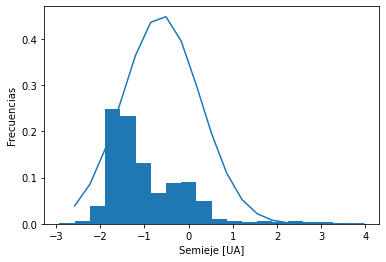

In [87]:
plt.bar(xlista,f,width=ancho,align='edge')
plt.plot(a[1],v_norm)
plt.xlabel('Semieje [UA]')
plt.ylabel('Frecuencias')

Como consideramos que la variable semieje proviene de una distribución continua entonces para compararla con una normal debemos usar el KS test.
Consideraremos como hipótesis nula

<center>
$H_0$ : ambas muestras provienen de la misma distribución
</center>

y como hipótesis alternativa

<center>
$H_i$ : ambas muestras provienen de distribuciones distintas
</center>

Como estadístico de prueba utilizaremos 

<center>
$D_{m,n}^{obs} = sup_x |F_{1,n} - F_{1,m}|$
</center>

donde $n$ y $m$ son los tamaños de las muestras, $F_{1,n}$ y $F_{1,m}$ son las funciones distribución empíricas, y rechazaremos la hipótesis nula cuando 

$ $

<center>
$D_{m,n}^{obs} > D_{max}^{\alpha}$ 
</center>

De este modo, si elegimos un nivel de significancia del 95% y teniendo $\nu$ = 18 (https://www.statisticshowto.com/kolmogorov-smirnov-test/#pvalue), tenemos que $D_{max}^{\alpha} = 0.309$.
Procedemos a calcular $D_{m,n}^{obs}$ usando la función $kstest$ del paquete $scipy$ 

In [88]:
ks_2samp(f, v_norm)

KstestResult(statistic=0.3, pvalue=0.24244968766417718)

Vemos que el KS test nos devuelve un $D_{m,n}^{obs}$ = 0.3, lo que hace que  tengamos que rechazarla hipótesis nula, y por lo tanto ambas muestras provienen de distribuciones distintas.

### Inciso c

In [68]:
radios =\\[]
masas2 = []

for i in range (len(results)):
    r = results[i][1]
    m2 = results[i][0]
    if r == r and m2 == m2:
        radios.append(np.log10(r))
        masas2.append(np.log10(m2))
   
        

In [69]:
len(radios)

939

In [71]:
len(masas2)

939

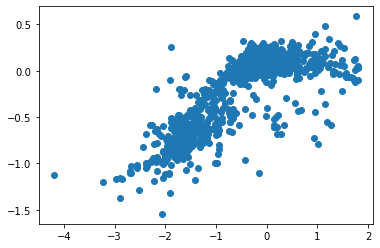

In [73]:
plt.scatter(masas2,radios)

In [90]:
mean2 = 0
std2 = np.std(masas2)
print(mean2,std2)

0 0.9888496938779363


In [91]:
v_norm2 = []
for i in range(len(masas2)):
    x2 = norm.pdf(masas2[i], loc=mean2, scale=std2)
    v_norm2.append(x2)

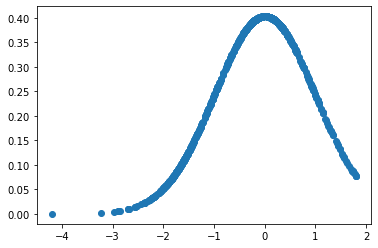

In [92]:
plt.scatter(masas2,v_norm2)